In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import re
import numpy

In [3]:
global_filenames = [
    ["Model-20170725224117548521.txt", "ResNet-32"],
    ["Model-20170726022552087922.txt", "ResNet-32"],
    ["Model-20170726101003060439.txt", "ResNet-32"],
    ["Model-20170725221410057251.txt", "ResNet-32"],
    ["Model-20170726013553231135.txt", "ResNet-32"],
    ["Model-20170726101155647069.txt", "ResNet-32"],
    ["Model-20170725225606608504.txt", "NMResNet-32"],
    ["Model-20170726014635135278.txt", "NMResNet-32"],
    ["Model-20170726102303409696.txt", "NMResNet-32"],
    ["Model-20170726134744043593.txt", "ResNet-32 big"],
    ["Model-20170726135628222114.txt", "ResNet-32 big"],
    ["Model-20170726140155681841.txt", "NMResNet-32 big"],
]

<IPython.core.display.Javascript object>


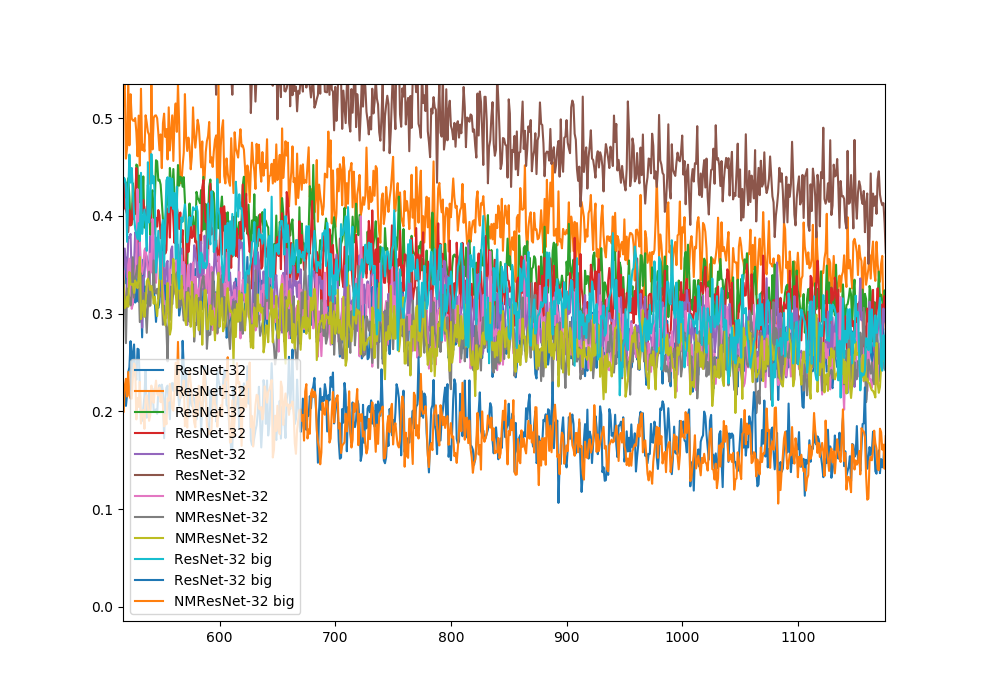

In [4]:
extract_loss = re.compile(r"epoch: (\d+), train set index: (\d+), average loss: (\d.\d+)")

for fn, lb in global_filenames:
    arr_loss = []
    with open(fn) as f:
        ctr = 0
        for line in f:
            match = extract_loss.match(line)
            if match:
                arr_loss.append(match.group(3))
    nparr_loss = numpy.array(arr_loss)
    plt.plot(nparr_loss, label=lb)

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


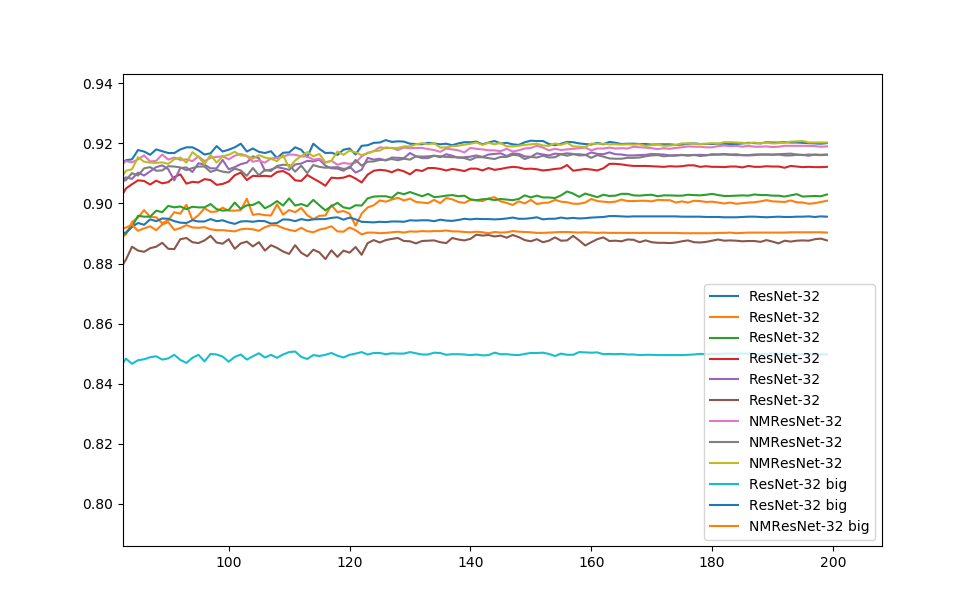

In [5]:
extract_accuracy = re.compile(r"Correct: (\d+), total: (\d+), accuracy: (\d.\d+), average loss: (\d.\d+)")

for fn, lb in global_filenames:
    arr_acc = []
    with open(fn) as f:
        ctr = 0
        for line in f:
            match = extract_accuracy.match(line)
            if match:
                arr_acc.append(match.group(3))
    nparr_acc = numpy.array(arr_acc)
    plt.plot(nparr_acc, label=lb)

plt.legend()
plt.show()

In [ ]:
momentum_filename = "Model-20170725225606608504.txt"

extract_num = 10
extract_str = r"momentum parameters: " + r"([+-]?\d?\.\d+), " * extract_num
extract_momentum = re.compile(extract_str[:-2])

arr_momentum = []

with open(momentum_filename) as f:
    ctr = 0
    for line in f:
        match = extract_momentum.match(line)
        if match:
            # arr_momentum.append(match.group([1, 2]))
            arr_momentum.append(match.group(*range(1, extract_num + 1)))

arr_momentum = list(zip(*arr_momentum))

for i, a in enumerate(arr_momentum):
    npl = numpy.array(a)
    plt.plot(npl, label=str(i))

plt.legend()
plt.show()